# Create latitude and longitude combinations

In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

44.121914043569944 -45.951568375453206
51.14538127084583 -172.65360738906244
-68.25393145746295 -142.37389359517923
75.45123497944087 -70.08701745595461
-19.69056537067216 -71.75450509259537
-66.53277115658315 23.447181917976224
-70.46832742215048 178.71185872225612
-29.77153571816128 -176.29399278327693
-33.16377684574085 177.63988557516302
41.280826176793454 121.78285044001632
35.642589571826704 83.1004089254568
-15.182751685286533 152.5932896814632
-53.37611126031897 -9.210582357808391
6.238417736698395 -80.23211723137901
60.299975015929164 102.226361929282
44.29740124869883 -123.61251062385873
86.29036387322247 -58.46038433704996
-4.910214276377772 117.5346079564273
-31.40905659675915 175.13743162086757
54.39152016756566 115.4404734025731
7.391854017739703 128.54308847542336
-30.447509564595762 -5.257749108578793
-46.845106705283946 -94.20424958209755
-66.30030922110546 -45.17548138907924
10.769251799208249 -169.66022032062023
73.02083486035013 29.423295898604778
-4.310161165766445

# Generate cities

In [10]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

648

# Get the city weather data

In [12]:
# Import the requests library.
import requests

In [13]:
# Import the API key.
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2f0c43d48fc47615c3783084696c475


In [15]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [17]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [21]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 49 of Set 37 | torbay
Processing Record 50 of Set 37 | provideniya
Processing Record 51 of Set 37 | mataura
Processing Record 52 of Set 37 | qaanaaq
Processing Record 53 of Set 37 | iquique
Processing Record 54 of Set 37 | bredasdorp
Processing Record 55 of Set 37 | kaitangata
Processing Record 56 of Set 37 | vaini
Processing Record 57 of Set 37 | ngunguru
Processing Record 58 of Set 37 | dalinghe
City not found. Skipping...
Processing Record 59 of Set 37 | leh
Processing Record 60 of Set 37 | samarai
Processing Record 61 of Set 37 | cape town
Processing Record 62 of Set 37 | la palma
Processing Record 63 of Set 37 | vanavara
Processing Record 64 of Set 37 | corvallis
Processing Record 65 of Set 37 | upernavik
Processing Record 66 of Set 37 | galesong
Processing Record 67 of Set 37 | kaeo
Processing Record 68 of Set 37 | verkh-usugli
Processing Record 69 of Set 37 | baculin
Processing Record 70 of Set 37 | jamestown
Processing Record 71 of Set 37 | castro
Processing R

Processing Record 37 of Set 40 | kahului
Processing Record 38 of Set 40 | yulara
Processing Record 39 of Set 40 | yei
Processing Record 40 of Set 40 | jalu
Processing Record 41 of Set 40 | diourbel
Processing Record 42 of Set 40 | mosbach
Processing Record 43 of Set 40 | porto novo
Processing Record 44 of Set 40 | ilulissat
Processing Record 45 of Set 40 | hue
Processing Record 46 of Set 40 | alofi
Processing Record 47 of Set 40 | vila do maio
Processing Record 48 of Set 40 | clyde river
Processing Record 49 of Set 40 | jawhar
Processing Record 50 of Set 40 | kirakira
Processing Record 1 of Set 41 | hobyo
Processing Record 2 of Set 41 | lebu
Processing Record 3 of Set 41 | kutum
Processing Record 4 of Set 41 | fortuna
Processing Record 5 of Set 41 | imbituba
Processing Record 6 of Set 41 | ulladulla
Processing Record 7 of Set 41 | bemidji
Processing Record 8 of Set 41 | arraial do cabo
Processing Record 9 of Set 41 | hilo
Processing Record 10 of Set 41 | wasilla
Processing Record 11 of

Processing Record 22 of Set 44 | inderborskiy
City not found. Skipping...
Processing Record 23 of Set 44 | sturgis
Processing Record 24 of Set 44 | rocky mountain house
Processing Record 25 of Set 44 | ust-tsilma
Processing Record 26 of Set 44 | bichura
Processing Record 27 of Set 44 | maarianhamina
Processing Record 28 of Set 44 | paraiso
Processing Record 29 of Set 44 | lorengau
Processing Record 30 of Set 44 | flinders
Processing Record 31 of Set 44 | baruun-urt
Processing Record 32 of Set 44 | mitsamiouli
Processing Record 33 of Set 44 | trinidad
Processing Record 34 of Set 44 | parian dakula
Processing Record 35 of Set 44 | laiyang
Processing Record 36 of Set 44 | yerbogachen
Processing Record 37 of Set 44 | villamontes
Processing Record 38 of Set 44 | kharp
Processing Record 39 of Set 44 | rocha
Processing Record 40 of Set 44 | fort nelson
Processing Record 41 of Set 44 | touros
Processing Record 42 of Set 44 | maypangdan
Processing Record 43 of Set 44 | ostrow mazowiecka
Process

Processing Record 5 of Set 48 | hargeysa
Processing Record 6 of Set 48 | villars-sur-glane
Processing Record 7 of Set 48 | namuac
Processing Record 8 of Set 48 | kuche
City not found. Skipping...
Processing Record 9 of Set 48 | north bend
Processing Record 10 of Set 48 | ardakan
Processing Record 11 of Set 48 | lamu
Processing Record 12 of Set 48 | matara
Processing Record 13 of Set 48 | viile satu mare
Processing Record 14 of Set 48 | kushima
Processing Record 15 of Set 48 | mecca
Processing Record 16 of Set 48 | tura
Processing Record 17 of Set 48 | waipawa
Processing Record 18 of Set 48 | cairns
Processing Record 19 of Set 48 | tokur
Processing Record 20 of Set 48 | sompeta
Processing Record 21 of Set 48 | hurghada
Processing Record 22 of Set 48 | kailua
Processing Record 23 of Set 48 | northam
Processing Record 24 of Set 48 | rio verde de mato grosso
Processing Record 25 of Set 48 | mirnyy
Processing Record 26 of Set 48 | rio grande city
Processing Record 27 of Set 48 | taonan
Proc

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,55.27,75,75,6.91,CA,2022-06-13 21:43:14
1,Provideniya,64.3833,-173.3000,41.36,75,100,8.99,RU,2022-06-13 21:43:14
2,Mataura,-46.1927,168.8643,43.48,93,97,13.80,NZ,2022-06-13 21:43:14
3,Qaanaaq,77.4840,-69.3632,30.04,73,36,2.77,GL,2022-06-13 21:43:15
4,Iquique,-20.2208,-70.1431,60.84,80,18,6.55,CL,2022-06-13 21:43:15
5,Bredasdorp,-34.5322,20.0403,55.18,83,100,9.78,ZA,2022-06-13 21:43:16
6,Kaitangata,-46.2817,169.8464,41.04,89,93,18.01,NZ,2022-06-13 21:43:16
7,Vaini,-21.2000,-175.2000,78.96,83,40,5.75,TO,2022-06-13 21:43:16
8,Ngunguru,-35.6167,174.5000,58.41,59,24,11.83,NZ,2022-06-13 21:43:17
9,Leh,34.1667,77.5833,52.50,53,25,4.54,IN,2022-06-13 21:43:18


In [25]:
# Reorder columns
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Torbay,75,CA,2022-06-13 21:43:14,75,47.6666,-52.7314,55.27,6.91
1,Provideniya,100,RU,2022-06-13 21:43:14,75,64.3833,-173.3000,41.36,8.99
2,Mataura,97,NZ,2022-06-13 21:43:14,93,-46.1927,168.8643,43.48,13.80
3,Qaanaaq,36,GL,2022-06-13 21:43:15,73,77.4840,-69.3632,30.04,2.77
4,Iquique,18,CL,2022-06-13 21:43:15,80,-20.2208,-70.1431,60.84,6.55


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot lat vs temp

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

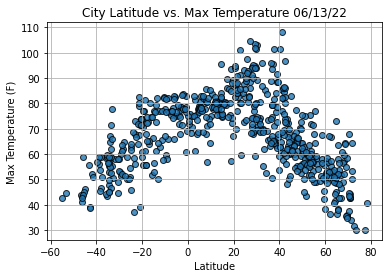

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# Plot lat vs humidity

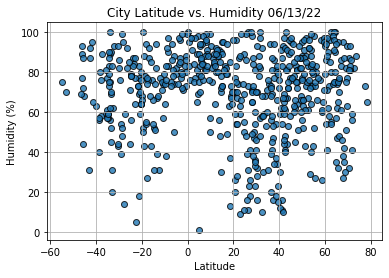

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# Plot lat vs cloudiness

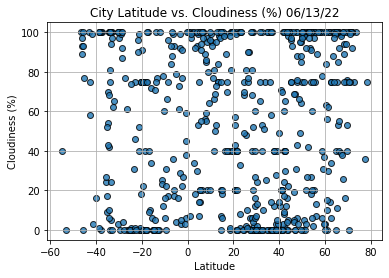

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# Plot lat vs wind speed

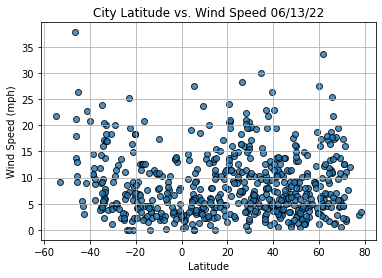

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Find correlation between lat and max temp

## Linear regression function

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Create hemisphere dataframes

In [35]:
index13 = city_data_df.loc[13]
index13

City                     Vanavara
Cloudiness                     84
Country                        RU
Date          2022-06-13 21:43:19
Humidity                       86
Lat                         60.34
Lng                      102.2797
Max Temp                    57.22
Wind Speed                   3.02
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
592     True
593     True
594     True
595    False
596     True
Name: Lat, Length: 597, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Torbay,75,CA,2022-06-13 21:43:14,75,47.6666,-52.7314,55.27,6.91
1,Provideniya,100,RU,2022-06-13 21:43:14,75,64.3833,-173.3000,41.36,8.99
3,Qaanaaq,36,GL,2022-06-13 21:43:15,73,77.4840,-69.3632,30.04,2.77
9,Leh,25,IN,2022-06-13 21:43:18,53,34.1667,77.5833,52.50,4.54
12,La Palma,75,US,2022-06-13 21:39:47,68,33.8464,-118.0467,85.50,10.36
...,...,...,...,...,...,...,...,...,...
591,Martinsville,0,US,2022-06-13 21:59:00,58,36.6915,-79.8725,93.49,6.91
592,Glenwood Springs,0,US,2022-06-13 21:54:44,15,39.5505,-107.3248,88.41,26.46
593,Kshenskiy,3,RU,2022-06-13 21:59:00,85,51.8408,37.7136,60.89,3.33
594,Buchanan,55,LR,2022-06-13 21:59:01,78,5.8808,-10.0467,78.12,9.19


In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Torbay,75,CA,2022-06-13 21:43:14,75,47.6666,-52.7314,55.27,6.91
1,Provideniya,100,RU,2022-06-13 21:43:14,75,64.3833,-173.3000,41.36,8.99
3,Qaanaaq,36,GL,2022-06-13 21:43:15,73,77.4840,-69.3632,30.04,2.77
9,Leh,25,IN,2022-06-13 21:43:18,53,34.1667,77.5833,52.50,4.54
12,La Palma,75,US,2022-06-13 21:39:47,68,33.8464,-118.0467,85.50,10.36


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

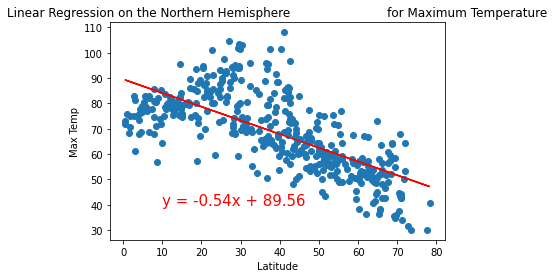

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

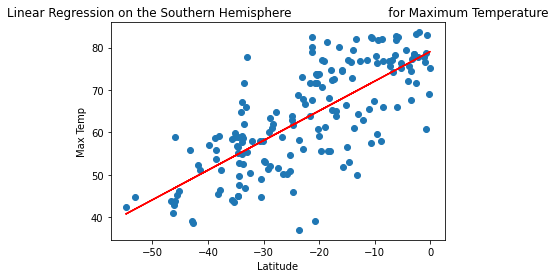

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# Correlation between lat and % humidity

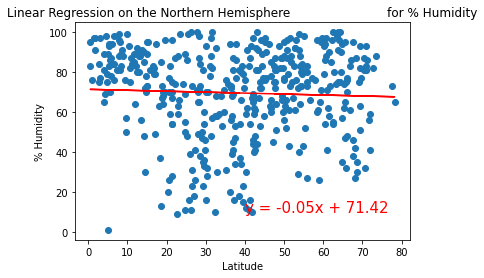

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

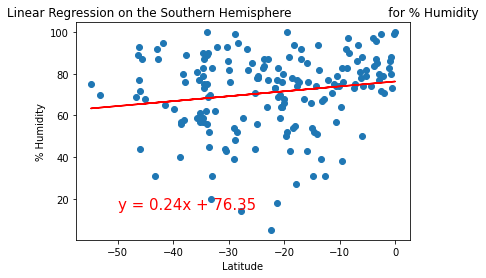

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

# Correlation between lat and % cloudiness

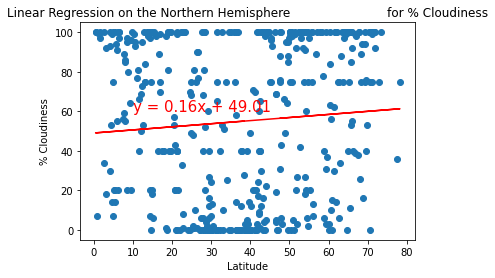

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

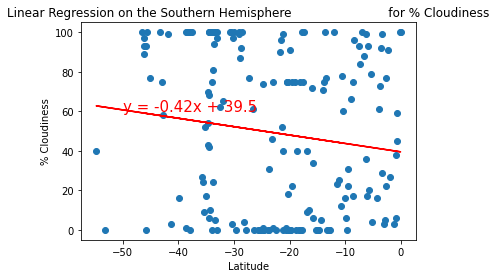

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

# Correlation between lat and wind speed

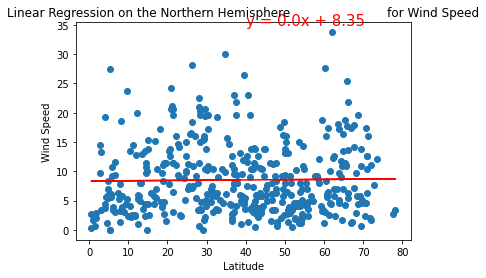

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

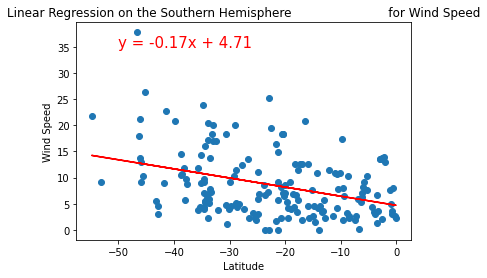

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))